#Image segmentaions

In [ ]:
# Install OpenCV
!pip install opencv-python-headless

# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Helper to display images
def show(img, title="Image", cmap_type='gray'):
    plt.imshow(img, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()


Saving Bike- Image Segmentation.jpeg to Bike- Image Segmentation (4).jpeg


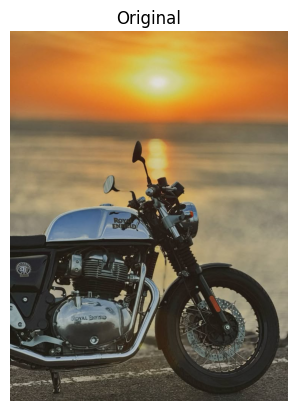

In [ ]:
# Install OpenCV
!pip install opencv-python-headless

# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Helper to display images
def show(img, title="Image", cmap_type='gray'):
    plt.imshow(img, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

from google.colab import files
uploaded = files.upload()

# Read image
import cv2  # Import OpenCV here to make it accessible in this cell.
import numpy as np
from google.colab import files
from PIL import Image

image = cv2.imdecode(np.frombuffer(uploaded[list(uploaded.keys())[0]], np.uint8), cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
show(image_rgb, "Original", cmap_type=None) # show function is now available

Pure Pixel-Based Segmentation Techniques

1. K-Means Pixel Clustering


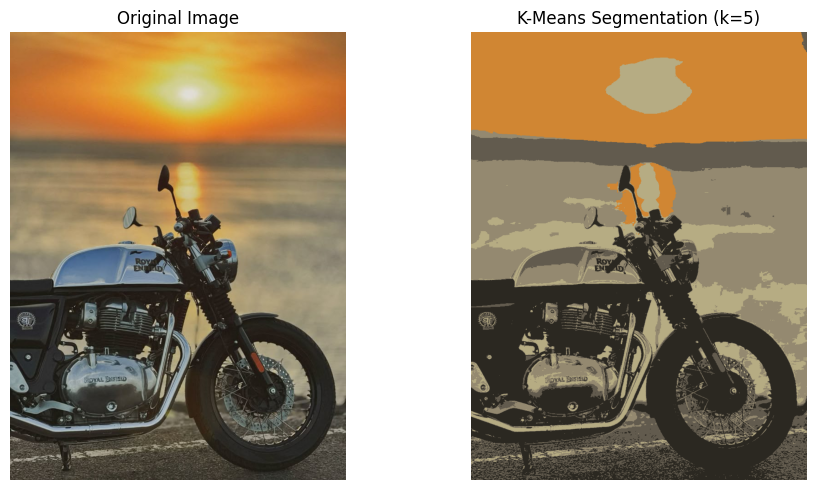

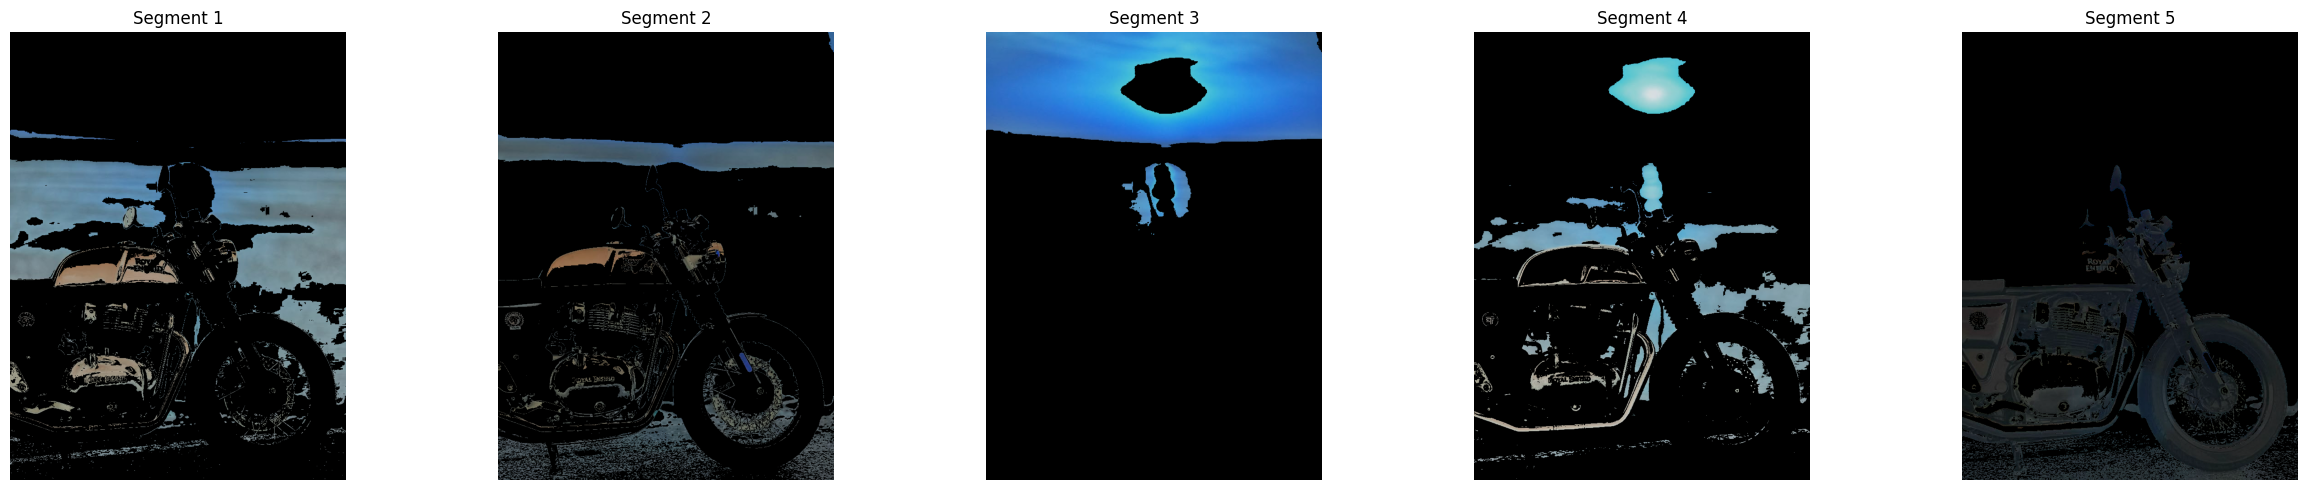

In [ ]:
import matplotlib.pyplot as plt

def display_images(images, titles, cmap_type=None):
    """Displays a list of images with their corresponding titles."""
    num_images = len(images)
    fig, axes = plt.subplots(1, num_images, figsize=(5 * num_images, 5))

    for i, (image, title) in enumerate(zip(images, titles)):
        axes[i].imshow(image, cmap=cmap_type)
        axes[i].set_title(title)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

print("Pure Pixel-Based Segmentation Techniques")

# 1. K-Means Pixel Clustering
print("\n1. K-Means Pixel Clustering")

# Reshape image to a 2D array of pixels for clustering
pixel_values = image_rgb.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define K-means parameters
k = 5  # Number of clusters
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
# OpenCV to stop the algorithm when either of the following conditions is met:
#Maximum iterations reached: 100 in this case.
#Centroids move less than epsilon (0.2)
# Perform K-means clustering
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back to uint8 values
centers = np.uint8(centers)

# Map each pixel to its corresponding center
segmented_image = centers[labels.flatten()]

# Reshape back to the original image dimensions
kmeans_result = segmented_image.reshape(image_rgb.shape)

# Create individual segment masks
segment_masks = []
segment_images = []
for i in range(k):
    mask = np.zeros(labels.shape, dtype=np.uint8)
    mask[labels.flatten() == i] = 255
    mask = mask.reshape(gray.shape)
    segment_masks.append(mask)

    # Apply mask to original image
    segment_img = cv2.bitwise_and(image, image, mask=mask)
    segment_images.append(segment_img)

# Display the results
display_images([image_rgb, kmeans_result],
              ['Original Image', 'K-Means Segmentation (k=5)'])

# Display individual segments
display_images(segment_images[:5],
              [f'Segment {i+1}' for i in range(5)])